MACHINE_LEARNING_HOMEWORK_1

STUDENT: WENXINZAHNG

# Hands on
Open the source code file hw1 code source.py from the .zip folder. Using the function get_a get a value for a, and draw a sample x_train, y_train of size N=10 and a sample x_test, y_test of size N_test = 1000 using the function draw_sample.

In [1]:
from hw1_code_source import get_a, draw_sample, get_design_mat, draw_sample_with_noise
import numpy as np
import matplotlib.pyplot as plt

### ANSWER TO Q_7

In [2]:
def least_square_estimator(X, y):
    """
    array: N*(d+1)
    array: d+1
    """
    N, d_plus_1 = X.shape 
    if N > (d_plus_1-1):
        return np.linalg.inv(X.T @ X) @ X.T @ y
    else:
        raise ValueError("N must be larger than d")

### ANSWER TO Q_8

In [3]:
def empirical_risk(X, y, b):
    N, _ = X.shape
    emp_risk = 1/(2*N) * np.linalg.norm(X @ b - y) **2
    return emp_risk

### ANSWER TO Q_9

The generated a is [-1.46027496  1.476993    4.84103081]
The estimated b is [-1.46027496e+00  1.47699300e+00  4.84103081e+00  2.04789785e-09
  1.30665967e-09  3.17754711e-11]
****************************************************************************************************
From the Plot_1, we can see that the scatter nearly perfect fits. 


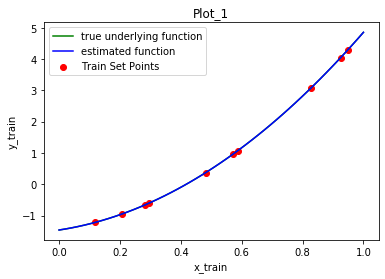

In [4]:
#X_train: N_train * (d+1)
#coeff: (d+1)*1
#y_train: N_train * 1
N_train, N_test = 10, 1000
true_d, esti_d = 2, 5
a = get_a(deg_true=true_d) 

# Design X_train by changing true_d to esti_d
# With the esti_d, use estimated_b to represent the latent relationship between x_train & y_train
x_train, y_train = draw_sample(deg_true=true_d, a=a, N=N_train) 
X_train = get_design_mat(x=x_train, deg=esti_d) 
esti_b = least_square_estimator(X_train, y_train) 
print(f'The generated a is {a}')
print(f'The estimated b is {esti_b}')
print('*'*100)
print('From the Plot_1, we can see that the scatter nearly perfect fits. ')

gx = get_design_mat(np.linspace(0,1),2) @ a
fb = get_design_mat(np.linspace(0,1),esti_d) @ esti_b

# Plot the True underlying functions
# Plot the Estimated function
plt.scatter(x_train, y_train, label='Train Set Points', color='red')
plt.plot(np.linspace(0,1), gx, label='true underlying function', color='green')
plt.plot(np.linspace(0,1), fb, label='estimated function', color='blue')
plt.title('Plot_1')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

### ANSWER TO Q_10

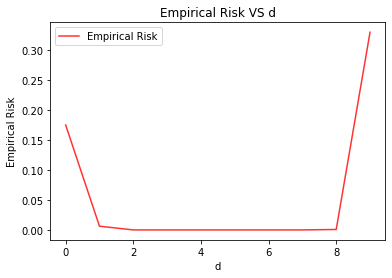

In [24]:
N_train, N_test = 10, 1000
emp_risk = []
for d in range(10):
    true_d, esti_d = 2, d 
    x_train, y_train = draw_sample(deg_true=true_d, a=a, N=N_train) 
    X_train = get_design_mat(x=x_train, deg=esti_d) 
    esti_b = least_square_estimator(X_train, y_train) 
    emp_risk.append(empirical_risk(X_train, y_train, esti_b))

plt.plot(range(10), emp_risk, label='Empirical Risk', color='red', alpha=0.8)
plt.title('Empirical Risk VS d')
plt.xlabel('d')
plt.ylabel('Empirical Risk')
plt.legend()
plt.show()

In [6]:
emp_risk

[1.5030719653456406,
 0.04886300621441407,
 9.68326761158792e-28,
 1.9938577708596854e-25,
 1.143015372461334e-22,
 1.0966908714390253e-19,
 1.9132537079401906e-16,
 2.9029778107946162e-11,
 0.01016300044355156,
 8.651662401906895]

- The Minimum value that we get a 'perfect fit' is 2, with the empirical risk=9.68326761158792e-28.

- This result is the same as the conclusion on the approximation error above. 

- Once the hypothesis space H_d has a degree d that is larger than the degree of the true underlying function, we could get the approximation error 0.

# In presence of noise

### ANSWER TO Q_11

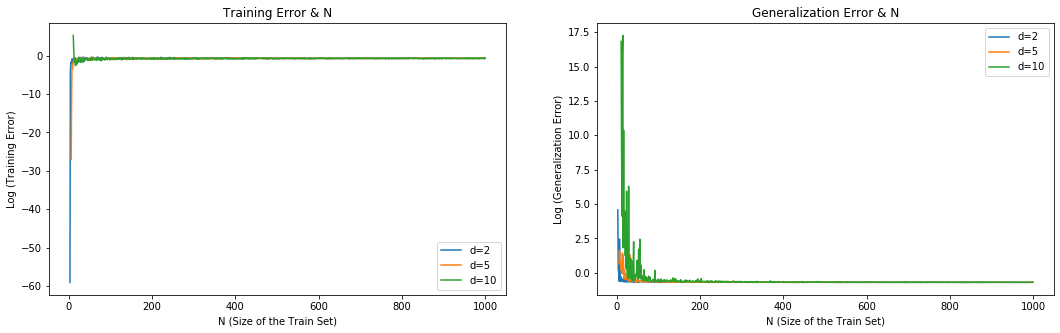

In [7]:
x_test, y_test = draw_sample_with_noise(deg_true=true_d, a=a, N=N_test)

def get_et_eg(esti_d):
    et = []
    eg = []
    for n in range(esti_d+1, 1000):
        x_train, y_train = draw_sample_with_noise(deg_true=true_d, a=a, N=n)
        X_train = get_design_mat(x_train, deg=esti_d)
        X_test = get_design_mat(x_test, deg=esti_d)
        esti_b = least_square_estimator(X_train, y_train) 
        et.append(empirical_risk(X_train, y_train, esti_b))
        eg.append(empirical_risk(X_test, y_test, esti_b))
    return et, eg
    

fig = plt.figure(figsize=(18,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

for esti_d in [2, 5, 10]:
    ax1.plot(range(esti_d+1,1000), np.log(get_et_eg(esti_d)[0]), label=f'd={esti_d}')
    ax2.plot(range(esti_d+1,1000), np.log(get_et_eg(esti_d)[1]), label=f'd={esti_d}')
    
ax1.set_title('Training Error & N')
ax2.set_title('Generalization Error & N')
ax1.set_xlabel('N (Size of the Train Set)')
ax2.set_xlabel('N (Size of the Train Set)')
ax1.set_ylabel('Log (Training Error)')
ax2.set_ylabel('Log (Generalization Error)')
ax1.legend()
ax2.legend()

plt.show()


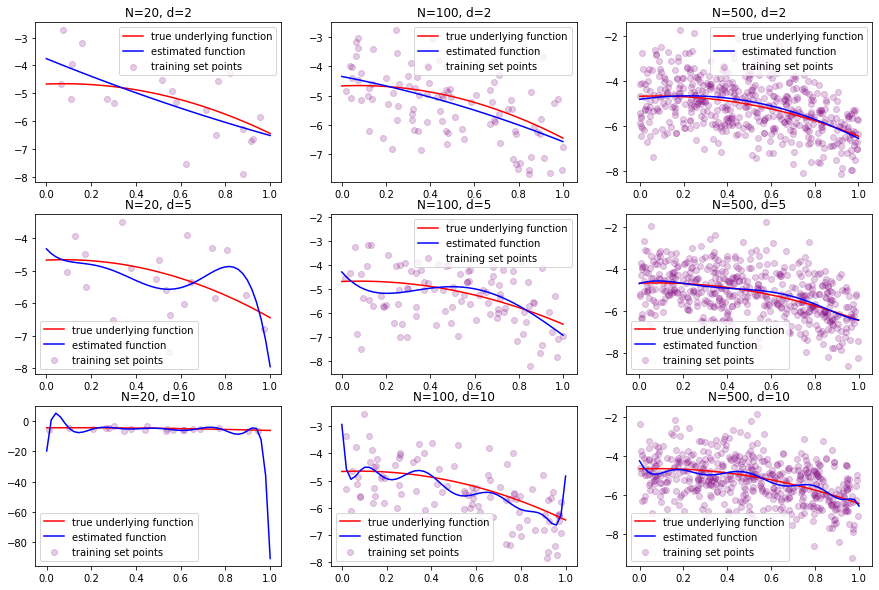

In [8]:
fig = plt.figure(figsize=(15,10))
iteration_times = 1
N_test = 1000

for esti_d in [2, 5, 10]:
    for N_train in [20, 100, 500]:
        x_train, y_train = draw_sample_with_noise(deg_true=true_d, a=a, N=N_train) 
        X_train = get_design_mat(x=x_train, deg=esti_d) 
        esti_b = least_square_estimator(X_train, y_train) 
        
        gx = get_design_mat(np.linspace(0,1), 2) @ a 
        fb = get_design_mat(np.linspace(0,1), esti_d) @ esti_b
        
        ax = fig.add_subplot(3,3,iteration_times)
        iteration_times += 1
        ax.scatter(x_train, y_train, label='training set points', color='purple', alpha=0.2)
        ax.plot(np.linspace(0,1), gx, label='true underlying function', color='red')
        ax.plot(np.linspace(0,1), fb, label='estimated function', color='blue')
        ax.set_title(f'N={N_train}, d={esti_d}')
        ax.legend()

### ANSWER TO Q_12
Recall the definition of the estimation error. Using the test set, (which we intentionally chose large so as to take advantage of the law of large numbers) give an empirical estimator of the estimation error. For the same values of N and d above plot the estimation error as a function of N (Plot 3).

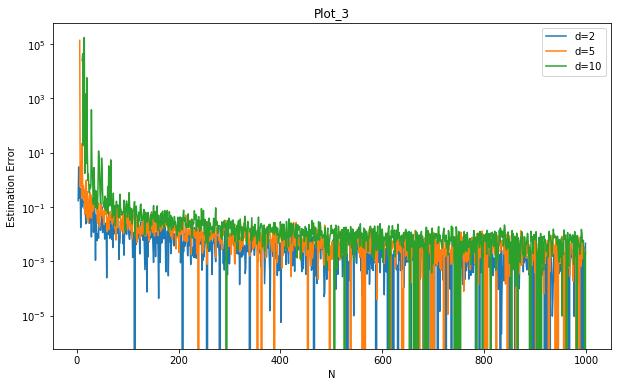

In [9]:
plt.figure(figsize=(10, 6))

x_test, y_test = draw_sample_with_noise(deg_true=true_d, a=a, N=N_test) 
X_test_ = get_design_mat(x=x_test, deg=true_d) 
risk = empirical_risk(X_test_, y_test, a)

def test_estimation_error(estimated_d):
    esti_err = []
    for N_train in range(estimated_d+1, 1000):
        x_train, y_train = draw_sample_with_noise(deg_true=true_d, a=a, N=N_train) 
        X_train = get_design_mat(x=x_train, deg=estimated_d) 
        estimated_b = least_square_estimator(X_train, y_train)
        
        X_test = get_design_mat(x=x_test, deg=estimated_d) 

        
        emp_risk = empirical_risk(X_test, y_test, estimated_b)
        esti_err.append(emp_risk-risk)
        
    return esti_err

for esti_d in [2, 5, 10]:
    plt.plot(range(esti_d+1,1000), test_estimation_error(esti_d), label=f'd={esti_d}')
    plt.yscale('log')
plt.legend();
plt.title('Plot_3');
plt.xlabel('N');
plt.ylabel('Estimation Error');

#### ANSWER TO Q_13

<font fontsize=30>
    
From Plot_2 and Plot_3:
- By increasing N, the estimation error and generalization error both decrease. With more data available, the law of large numbders can be fully taken use of, thus our estimation about the expected risk using the average behavior could be more accurate. 

- By increasing d, the estimation error and generalization error both increase. With the same amount of data and an estimated function with greater degree, chances are that we may choose a much more complex function and lead to overfit easily.

- To sum up, the estimation error and generalization are highly correlated.
    
 
<font>

#### ANSWER TO Q_14

- In this case, there is no optimization function. 

- Since the empirical risk function here is convex, we could calculate the global minimum directly, rather than keep wandering aound the true empirical risk minimizer.

### APPLICATION TO OZONE DATA

In [10]:
ls

1003-HW1.ipynb      hw1.pdf             hw1_code_source.py  ozone_wind.data
__pycache__/        hw1.tex             math_commands.tex


In [11]:
# You can try polynomial fits of the ozone values as a function of the wind values.

In [12]:
import numpy as np
import pandas as pd

# import data

data_arr = np.loadtxt('ozone_wind.data')
data = pd.DataFrame(data_arr, columns=['ozone_measurements', 'wind_measurements'])

In [13]:
# data.sample(n=300, replace=True) 